# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
from matplotlib import cm
import pandas as pd
import numpy as np
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: sat_2017.csv has 50 entries in 5 data columns namely State, Participation, Evidence based reading and writing, Math and Total. It has a memory usage of 2.1kb. SAT scores are organized per state for ERW and Math and the respective state's participation.

act_2017.csv has 51 entries in 7 data columns namely State, Participation, English, Math, Reading, Science and Composite. It has a memory usage of 2.9kb. The ACT scores are organized per state for English, Math, Reading, Science and Composite. National Average is the additional entry in this data set.

#### 4a. Does the data look complete? 

Answer: Yes the data looks complete

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
#sat_2017[['Evidence-Based Reading and Writing','Math']].min()
sat_2017.iloc[:,2:4].min()

Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64

In [6]:
#sat_2017[['Evidence-Based Reading and Writing','Math']].max()
sat_2017.iloc[:,2:4].max()

Evidence-Based Reading and Writing    644
Math                                  651
dtype: int64

In [7]:
#act_2017[['English','Math','Reading','Science','Composite']].min()
act_2017.iloc[:,2:].min()

English      16.3
Math         18.0
Reading      18.1
Science       2.3
Composite    17.8
dtype: float64

In [8]:
#act_2017[['English','Math','Reading','Science','Composite']].max()
act_2017.iloc[:,2:].max()

English      25.5
Math         25.3
Reading      26.0
Science      24.9
Composite    25.5
dtype: float64

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation rates column in sat_2017 dataset is captured as 'object' which is not correct. Similarly Participation rate and Composite columns in act_2017 dataset is captured as 'object' which is also not correct.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#code
def convert_to_numeric(df):
    #df.iloc['Participation'] = df['Participation'].map(lambda x: x.strip('%')).astype('float') / 100.0\
    #df.iloc[:,1:2] = df.iloc[:,1:2].map(lambda x: x.strip('%')).astype('float') / 100.0
    if df.Participation.dtype != ('float64'):
        df.Participation = df.Participation.map(lambda x: x.strip('%')).astype('float') / 100.0

convert_to_numeric(sat_2017)

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
convert_to_numeric(act_2017)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
#act_2017.Participation = act_2017.Participation.map(lambda x: x.strip('%')).astype('float') / 100.0
if act_2017.Composite.dtype != 'float64':
    act_2017.Composite = act_2017.Composite.map(lambda x: x.strip('x')).astype('float')
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


- Display the data types again to confirm they are correct.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#code
sat_2017 = sat_2017.rename(index=str, columns={'State': 'state', 'Participation': 'participation_sat_2017','Evidence-Based Reading and Writing':'ebrw_2017','Math':'math_sat_2017','Total':'total_2017'})
act_2017 = act_2017.rename(index=str, columns={'State': 'state', 'Participation': 'participation_act_2017','English':'english_2017','Math':'math_act_2017','Reading':'reading_2017','Science':'science_2017','Composite':'composite_2017'})

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state				    |object	    |SAT|States participating in the 2017 SAT exams| 
|participation_sat_2017	|float64	|SAT|SAT Participation Rates 2017
|ebrw_2017			    |float64	|SAT|SAT Evidence based Reading and Writing 2017
|math_sat_2017		    |float64	|SAT|SAT Mathematics score 2017
|total_2017			    |float64	|SAT|SAT Total score 2017
|state				    |float64	|ACT|ACT participation states for 2017
|participation_act_2017	|float64	|ACT|ACT participation rates for 2017
|english_2017			|float64	|ACT|ACT English score 2017
|math_act_2017		    |float64	|ACT|ACT Mathematics score 2017
|reading_2017			|float64	|ACT|ACT Reading score 2017
|science_2017			|float64    |ACT|ACT Science score 2017
|composite_2017         |float64	|ACT|ACT Composite score 2017	|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [16]:
#code
act_2017_upd = act_2017 [1:]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [17]:
#Code:
#combined_2017 = sat_2017.set_index('state').join(act_2017_upd.set_index('state'),how='inner',lsuffix='_caller', rsuffix='_other')
combined_2017 = sat_2017.set_index('state').merge(act_2017_upd,how='inner',left_on='state', right_on='state')
#combined_2017.info()

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [18]:
#code
combined_2017.to_csv('../data/combined_2017.csv', sep=',', encoding='utf-8')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [19]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
len(sat_2018),len(act_2018)
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: x.strip('%')).astype('float') / 100.0
act_2018['Participation'] = act_2018['Participation'].map(lambda x: x.strip('%')).astype('float') / 100.0
act_2018['Composite'] = act_2018['Composite'].astype('float')
sat_2018 = sat_2018.rename(index=str, columns={'State': 'state', 'Participation': 'participation_sat_2018','Evidence-Based Reading and Writing':'ebrw_2018','Math':'math_sat_2018','Total':'total_2018'})
act_2018 = act_2018.rename(index=str, columns={'State': 'state', 'Participation': 'participation_act_2018','English':'english_2018','Math':'math_act_2018','Reading':'reading_2018','Science':'science_2018','Composite':'composite_2018'})

#combined_2018 = sat_2018.merge(act_2018,how='inner',left_on=['state'],right_on=['state'])
#combined_2018 = sat_2018.set_index('state').join(act_2018.set_index('state'),how='inner',lsuffix='_caller', rsuffix='_other')
combined_2018 = sat_2018.set_index('state').merge(act_2018,how='inner',left_on='state', right_on='state')
combined_2018.to_csv('../data/combined_2018.csv', sep=',', encoding='utf-8')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [20]:
final = combined_2017.merge(combined_2018,how='inner',left_on=['state'],right_on=['state'])
#final = combined_2017.set_index('state').join(combined_2018.set_index('state'),how='inner',lsuffix='_caller', rsuffix='_other')
final.to_csv('../data/final.csv', sep=',', encoding='utf-8')
#final

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [21]:
#Code:
finalT = final.T
finalT = finalT[1:]
finalT

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
participation_sat_2017,0.05,0.38,0.3,0.03,0.53,0.11,1,1,1,0.83,...,0.03,0.05,0.62,0.03,0.6,0.65,0.64,0.14,0.03,0.03
ebrw_2017,593,547,563,614,531,606,530,503,482,520,...,612,623,513,624,562,561,541,558,642,626
math_sat_2017,572,533,553,594,524,595,512,492,468,497,...,603,604,507,614,551,541,534,528,649,604
total_2017,1165,1080,1116,1208,1055,1201,1041,996,950,1017,...,1216,1228,1020,1238,1114,1102,1075,1086,1291,1230
participation_act_2017,1,0.65,0.62,1,0.31,1,0.31,0.18,0.32,0.73,...,0.8,1,0.45,1,0.29,0.29,0.29,0.69,1,1
english_2017,18.9,18.7,18.6,18.9,22.5,20.1,25.5,24.1,24.4,19,...,20.7,19.5,19.5,19.5,23.3,23.5,20.9,20,19.7,19.4
math_act_2017,18.4,19.8,19.8,19,22.7,20.3,24.6,23.4,23.5,19.4,...,21.5,19.2,20.7,19.9,23.1,23.3,21.9,19.4,20.4,19.8
reading_2017,19.7,20.4,20.1,19.7,23.1,21.2,25.6,24.8,24.9,21,...,22.3,20.1,21.1,20.8,24.4,24.6,22.1,21.2,20.6,20.8
science_2017,19.4,19.9,19.8,19.5,22.2,20.9,24.6,23.6,23.5,19.4,...,22,19.9,20.9,20.6,23.2,23.5,22,20.5,20.9,20.6
composite_2017,19.2,19.8,19.7,19.4,22.8,20.8,25.2,24.1,24.2,19.8,...,21.8,19.8,20.7,20.3,23.6,23.8,21.9,20.4,20.5,20.2


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [22]:
#code
def std_dev(values):
    return (sum([(x-sum(values)/len(values))**2 for x in values])/len(values))**0.5

#np.std([2,4,6]),std_dev([2,4,6])

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [23]:
#Code:
{key:std_dev(row) for key,row in finalT.iterrows()}

#for index, row in finalT.iterrows():
   # for col in row:
      #  print(index,col)
    
#for key,row in finalT  

{'participation_sat_2017': 0.3492907076664507,
 'ebrw_2017': 45.21697020437866,
 'math_sat_2017': 84.07255521608297,
 'total_2017': 91.58351056778743,
 'participation_act_2017': 0.3182417575123181,
 'english_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_2017': 2.0469029314842646,
 'science_2017': 3.151107895464408,
 'composite_2017': 2.000786081581989,
 'participation_sat_2018': 0.3763965409204987,
 'ebrw_2018': 44.87118561762388,
 'math_sat_2018': 48.72908417723463,
 'total_2018': 93.51172603783118,
 'participation_act_2018': 0.33745194881997503,
 'english_2018': 13.867666985479067,
 'reading_2018': 13.243265573301123,
 'math_act_2018': 15.11043545089191,
 'science_2018': 13.58870213950607,
 'composite_2018': 2.0968220768561987}

In [24]:
final.describe()

,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,composite_2017,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,0.466275,567.294118,557.470588,1125.294118,0.616471,64.627451,50.294118,44.294118,40.882353,21.498039
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,0.380142,45.317676,49.213963,94.442214,0.340810,14.005657,13.375043,15.260792,13.723916,2.117686
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.020000,497.000000,480.000000,977.000000,0.070000,38.000000,27.000000,21.000000,18.000000,17.700000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.045000,535.000000,521.500000,1062.500000,0.285000,53.500000,40.500000,32.000000,30.500000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,547.000000,1099.000000,0.660000,61.000000,49.000000,42.000000,38.000000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,0.795000,616.500000,600.500000,1229.500000,1.000000,79.000000,63.500000,59.500000,54.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,90.000000,75.000000,74.000000,67.000000,25.600000


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

Manually calculated standard deviation don't match up with panda/numpy due to 1/n-1 usage instead of 1/n

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [25]:
#code
final.sort_values('participation_sat_2017',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,70,60,54,51,23.6
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.00,511,499,1011,0.22,84,67,65,60,24.4
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.00,535,519,1053,0.26,90,75,71,67,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,79,64,59,56,23.8
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,0.96,535,528,1063,0.16,88,73,72,64,25.1


In [26]:
final.sort_values('participation_sat_2017',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,0.02,640,643,1283,0.98,57,43,39,34,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,...,0.03,630,606,1236,1.00,47,29,21,20,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,0.03,634,632,1265,0.68,70,54,44,45,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,...,0.04,633,629,1262,1.00,56,41,33,32,20.0
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,...,0.04,618,612,1230,1.00,58,43,36,34,20.4


In [27]:
final.sort_values('participation_sat_2018',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,1.0,519,506,1025,0.30,82,65,61,57,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.0,535,519,1053,0.26,90,75,71,67,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.0,505,492,998,0.17,79,64,59,56,23.8
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.0,511,499,1011,0.22,84,67,65,60,24.4
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,...,1.0,508,493,1001,0.36,73,58,49,46,22.3


In [28]:
final.sort_values('participation_sat_2018',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,0.02,640,643,1283,0.98,57,43,39,34,20.3
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,...,0.03,633,635,1257,1.00,55,41,33,33,20.0
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,...,0.03,622,618,1241,0.77,68,54,49,46,21.9
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,...,0.03,629,623,1252,1.00,56,40,35,33,20.1
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,...,0.03,641,653,1294,1.00,59,42,40,36,20.5


In [29]:
final.sort_values('participation_act_2017',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.0,51,35,23,24,19.1
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,...,0.04,630,618,1248,1.0,59,43,33,32,20.2
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,...,0.03,641,653,1294,1.0,59,42,40,36,20.5
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,...,0.04,618,612,1230,1.0,58,43,36,34,20.4
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,...,0.06,624,607,1231,1.0,54,38,28,28,19.6


In [30]:
final.sort_values('participation_act_2017',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,0.99,512,501,1013,0.07,84,69,64,56,24.0
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,0.96,535,528,1063,0.16,88,73,72,64,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,79,64,59,56,23.8
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,0.97,513,505,1018,0.15,85,69,64,58,24.2
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,...,0.70,547,539,1086,0.20,80,64,60,55,23.5


In [31]:
final.sort_values('participation_act_2018',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.0,51,35,23,24,19.1
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,...,0.04,630,618,1248,1.0,59,43,33,32,20.2
49,Wisconsin,0.03,642,649,1291,1.0,19.7,20.4,20.6,20.9,...,0.03,641,653,1294,1.0,59,42,40,36,20.5
44,Utah,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,...,0.04,618,612,1230,1.0,58,43,36,34,20.4
42,Tennessee,0.05,623,604,1228,1.0,19.5,19.2,20.1,19.9,...,0.06,624,607,1231,1.0,54,38,28,28,19.6


In [32]:
final.sort_values('participation_act_2018',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,0.99,512,501,1013,0.07,84,69,64,56,24.0
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,0.97,513,505,1018,0.15,85,69,64,58,24.2
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,0.96,535,528,1063,0.16,88,73,72,64,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,79,64,59,56,23.8
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,...,0.70,547,539,1086,0.20,80,64,60,55,23.5


In [33]:
#Which states have the highest and lowest mean total/composite scores for the:
final.sort_values('total_2017',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,...,0.04,643,655,1298,0.99,60,48,47,42,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,...,0.03,641,653,1294,1.00,59,42,40,36,20.5
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,0.03,634,632,1265,0.68,70,54,44,45,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,...,0.04,633,629,1262,1.00,56,41,33,32,20.0
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,...,0.04,633,631,1265,0.71,67,52,44,41,21.6


In [34]:
final.sort_values('total_2017',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,70,60,54,51,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,79,64,59,56,23.8
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,...,1.00,508,493,1001,0.36,73,58,49,46,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.00,511,499,1011,0.22,84,67,65,60,24.4
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,0.99,512,501,1013,0.07,84,69,64,56,24.0


In [35]:
final.sort_values('composite_2017',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,0.96,535,528,1063,0.16,88,73,72,64,25.1
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,...,0.80,562,563,1125,0.25,88,74,74,66,25.5
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.00,535,519,1053,0.26,90,75,71,67,25.6
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,0.99,512,501,1013,0.07,84,69,64,56,24.0
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,70,60,54,51,23.6


In [36]:
final.sort_values('composite_2017',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,...,0.23,574,566,1140,1.00,38,27,21,18,17.7
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,...,0.03,630,606,1236,1.00,47,29,21,20,18.6
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,42,30,24,20,18.3
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,...,0.56,550,549,1099,0.89,48,32,28,24,18.9
33,North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,...,0.52,554,543,1098,1.00,46,35,31,25,19.1


In [37]:
final.sort_values('total_2018',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,...,0.04,643,655,1298,0.99,60,48,47,42,21.3
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,...,0.03,641,653,1294,1.00,59,42,40,36,20.5
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,0.02,640,643,1283,0.98,57,43,39,34,20.3
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,0.03,634,632,1265,0.68,70,54,44,45,21.8
16,Kansas,0.04,632,628,1260,0.73,21.1,21.3,22.3,21.7,...,0.04,633,631,1265,0.71,67,52,44,41,21.6


In [38]:
final.sort_values('total_2018',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,70,60,54,51,23.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,79,64,59,56,23.8
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,...,0.28,513,486,999,0.65,61,46,30,32,20.3
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,...,1.00,508,493,1001,0.36,73,58,49,46,22.3
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.00,511,499,1011,0.22,84,67,65,60,24.4


In [39]:
final.sort_values('composite_2018',ascending=False).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.00,535,519,1053,0.26,90,75,71,67,25.6
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,...,0.80,562,563,1125,0.25,88,74,74,66,25.5
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,0.96,535,528,1063,0.16,88,73,72,64,25.1
32,New York,0.67,528,523,1052,0.31,23.8,24.0,24.6,23.9,...,0.79,534,534,1068,0.27,83,68,67,62,24.5
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.00,511,499,1011,0.22,84,67,65,60,24.4


In [40]:
final.sort_values('composite_2018',ascending=True).head()

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,...,0.23,574,566,1140,1.00,38,27,21,18,17.7
40,South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,42,30,24,20,18.3
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,...,0.03,630,606,1236,1.00,47,29,21,20,18.6
11,Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,...,0.56,550,549,1099,0.89,48,32,28,24,18.9
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,51,35,23,24,19.1


In [41]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#list(final[final['participation_sat_2017']==1.0].state)
for x in list(final[final['participation_sat_2017']==1.0].state):
    if x not in list(final[final['participation_sat_2018']==1.0].state):
        print(x)

District of Columbia


In [42]:
#Do any states show have >50% participation on both tests either year?
#list(final[final['participation_sat_2017']>0.5].state)
for x in list(final[final['participation_sat_2017']>0.5].state):
    if x in list(final[final['participation_sat_2018']>0.5].state):
        print(x)

California
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Indiana
Maine
Maryland
Massachusetts
Michigan
New Hampshire
New Jersey
New York
Pennsylvania
Rhode Island
Texas
Vermont
Virginia
Washington


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

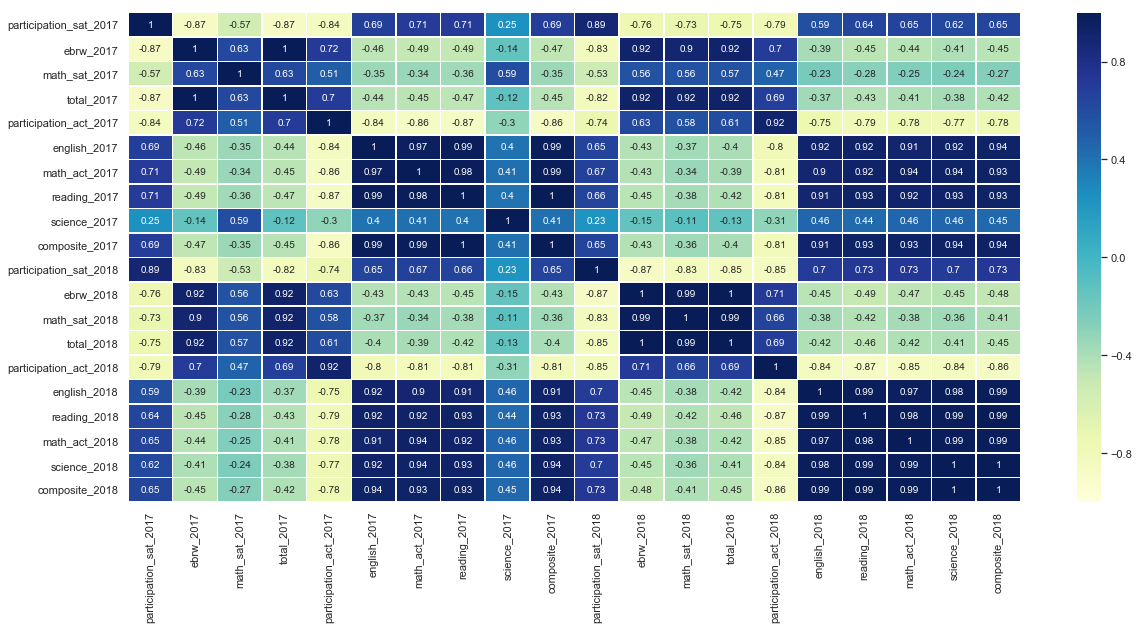

In [43]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(final.corr(),vmin=-1,annot=True,linewidths=.5,cmap="YlGnBu");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [44]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

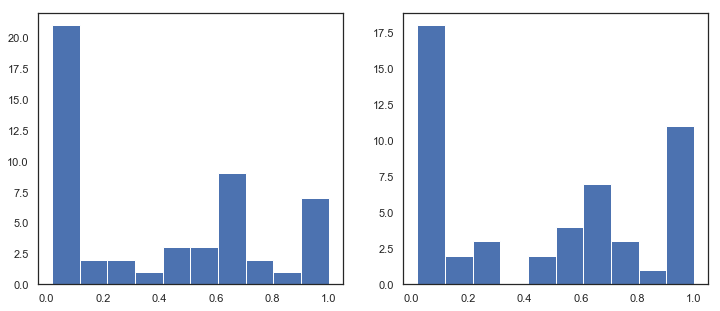

In [45]:
# Code Particaption rates histogram
#final[['participation_sat_2017','participation_sat_2018']].plot(kind='hist', bins=20)
subplot_histograms(final,['participation_sat_2017','participation_sat_2018'],['Participation'],['2017-2018'])

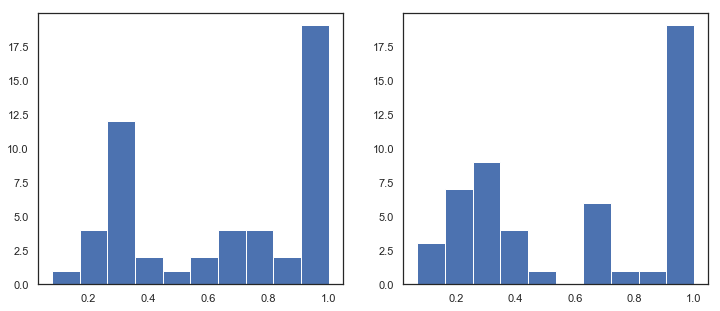

In [46]:
subplot_histograms(final,['participation_act_2017','participation_act_2018'],['Participation'],['2017-2018'])

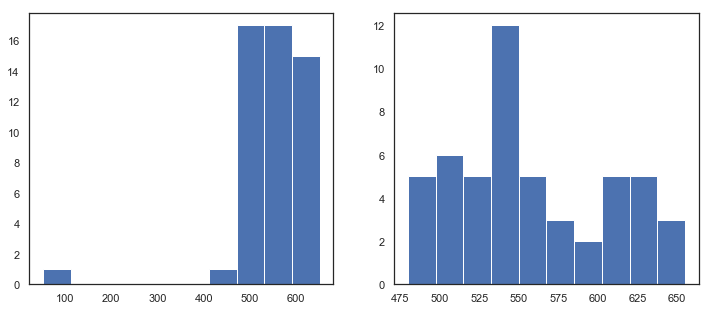

In [47]:
subplot_histograms(final,['math_sat_2017','math_sat_2018'],['Math'],['2017-2018'])

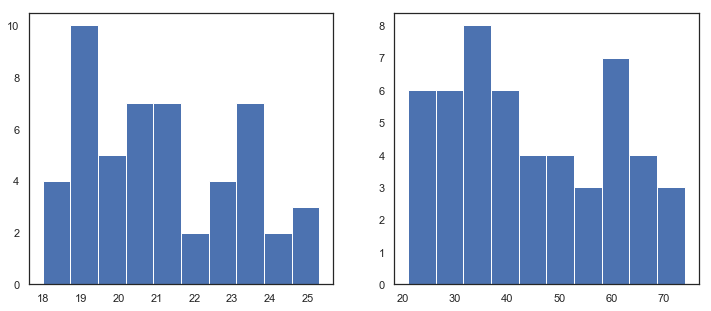

In [48]:
subplot_histograms(final,['math_act_2017','math_act_2018'],['Math'],['2017-2018'])

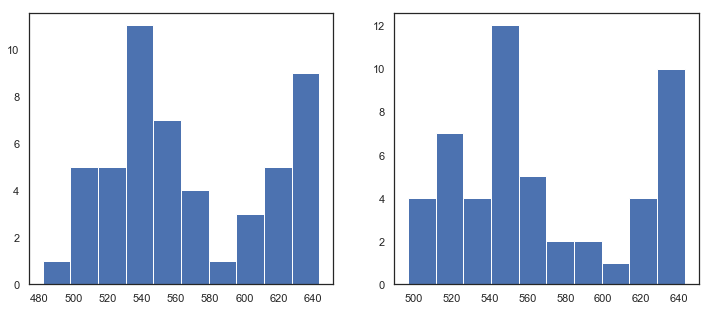

In [49]:
subplot_histograms(final,['ebrw_2017','ebrw_2018'],['Evidence Based Reading/Writing'],['2017-2018'])

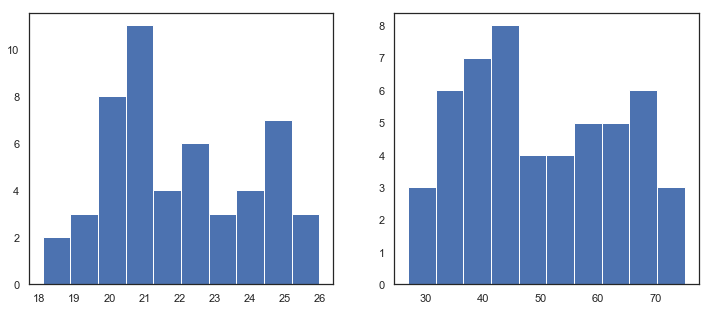

In [50]:
subplot_histograms(final,['reading_2017','reading_2018'],['Reading'],['2017-2018'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT vs. ACT math scores for 2017')

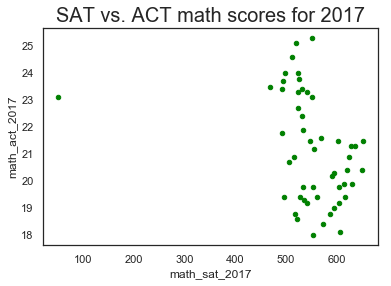

In [51]:
# Code
final.plot.scatter(x='math_sat_2017', y='math_act_2017',c='green');
plt.title("SAT vs. ACT math scores for 2017",fontsize=20)

Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores for 2017')

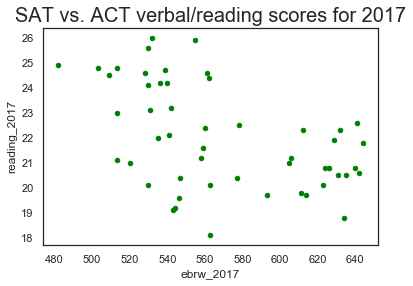

In [52]:
final.plot.scatter(x='ebrw_2017', y='reading_2017',c='green');
plt.title("SAT vs. ACT verbal/reading scores for 2017",fontsize=20)

Text(0.5, 1.0, 'SAT vs. ACT total/composite scores for 2017')

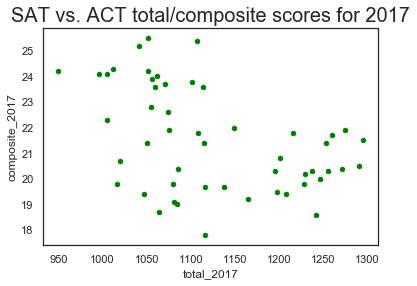

In [53]:
final.plot.scatter(x='total_2017', y='composite_2017',c='green');
plt.title("SAT vs. ACT total/composite scores for 2017",fontsize=20)

Text(0.5, 1.0, 'Total scores for SAT 2017 vs. 2018')

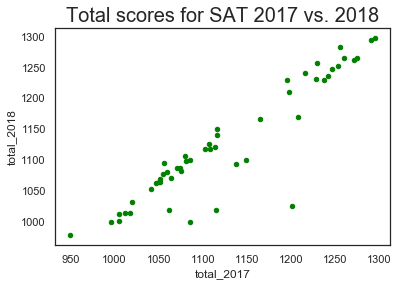

In [54]:
final.plot.scatter(x='total_2017', y='total_2018',c='green');
plt.title("Total scores for SAT 2017 vs. 2018",fontsize=20)

Text(0.5, 1.0, 'Composite scores for ACT 2017 vs. 2018')

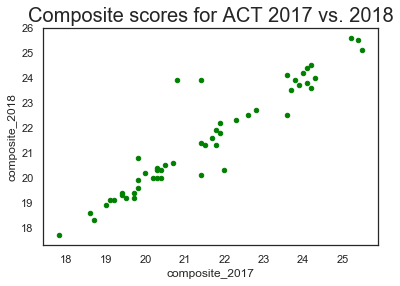

In [55]:
final.plot.scatter(x='composite_2017', y='composite_2018',c='green');
plt.title("Composite scores for ACT 2017 vs. 2018",fontsize=20)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

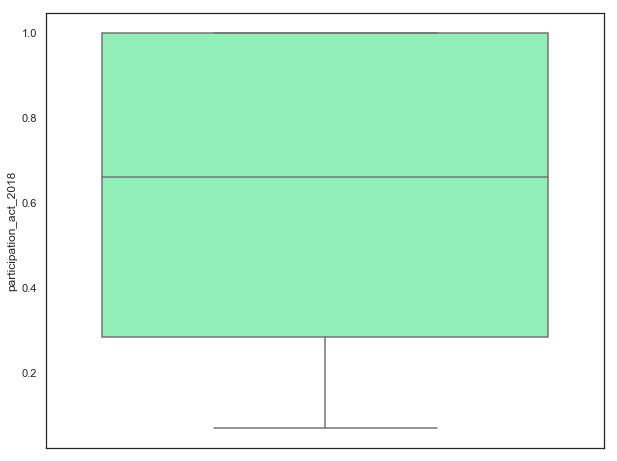

In [56]:
# Code
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='participation_act_2018')

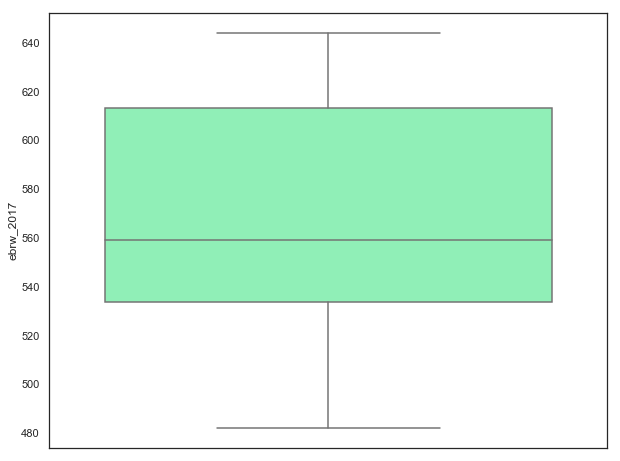

In [57]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='ebrw_2017')

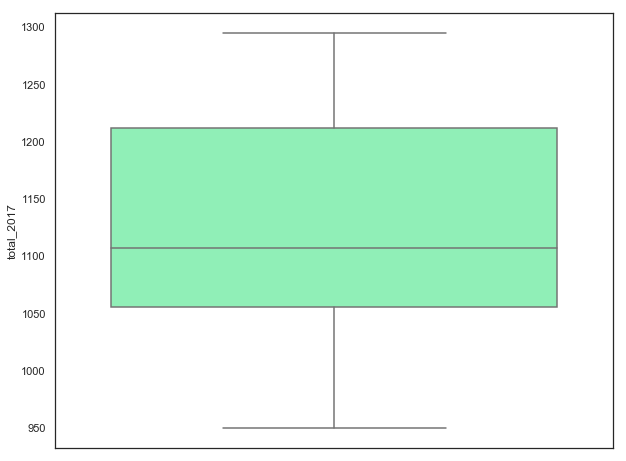

In [58]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='total_2017')
#sns.boxplot(y='total_2017', data=final)

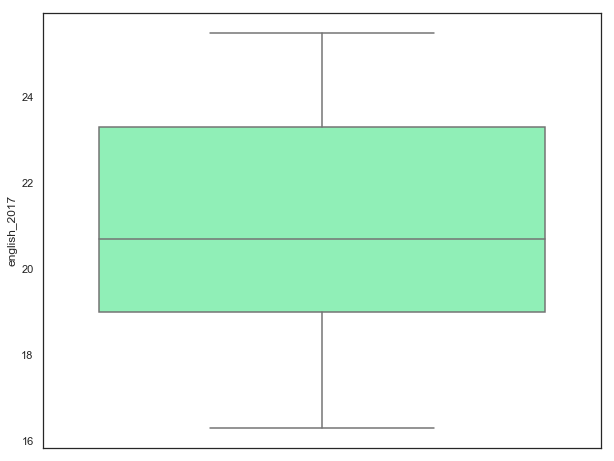

In [59]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='english_2017')
#sns.boxplot(y='english_2017', data=final)

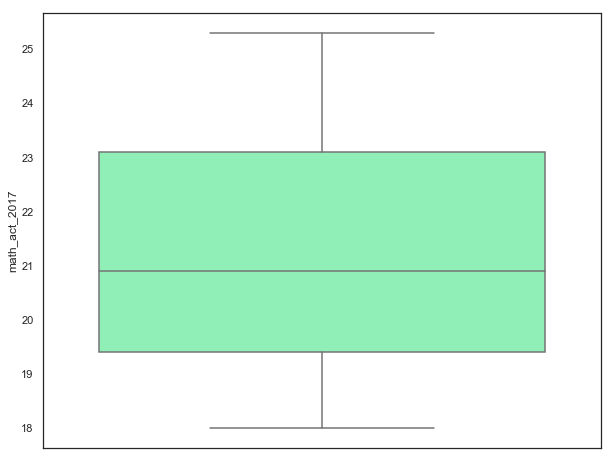

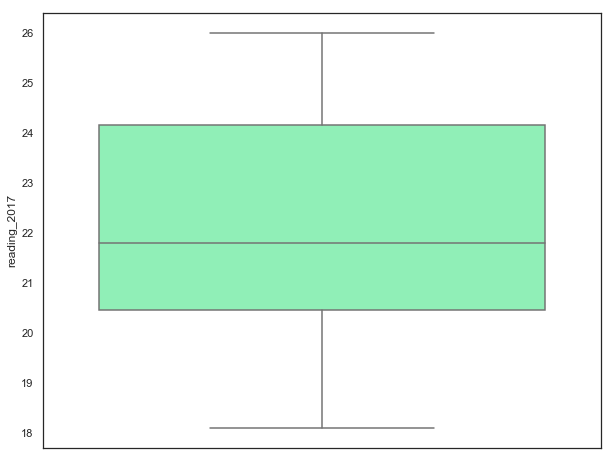

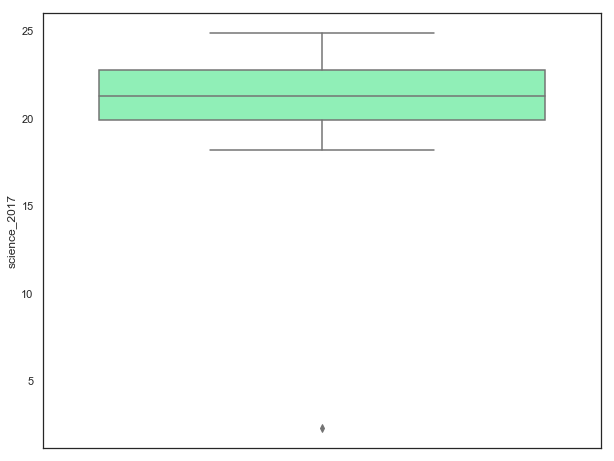

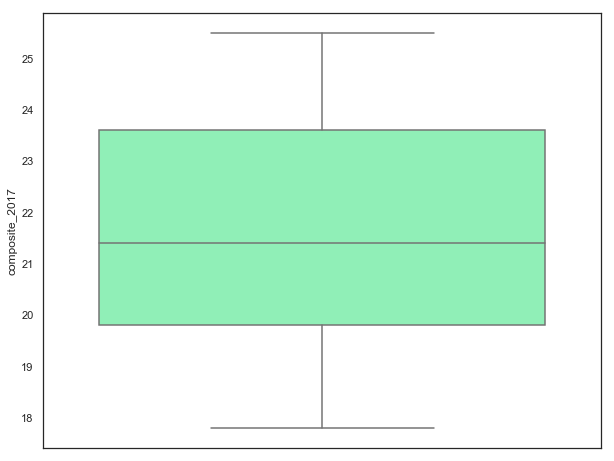

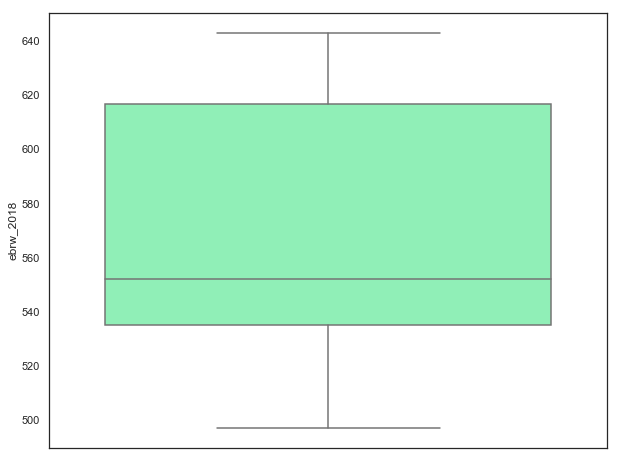

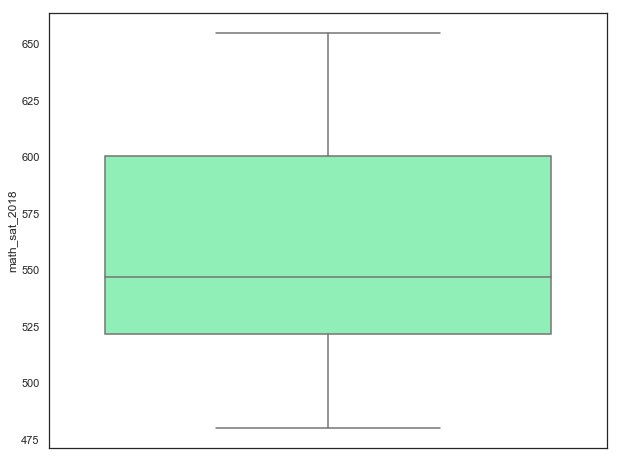

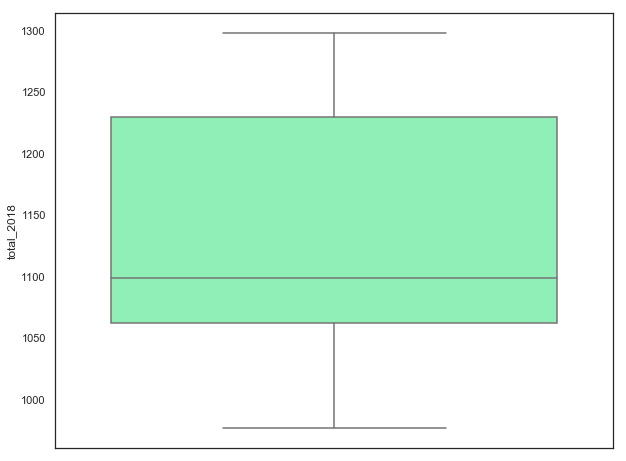

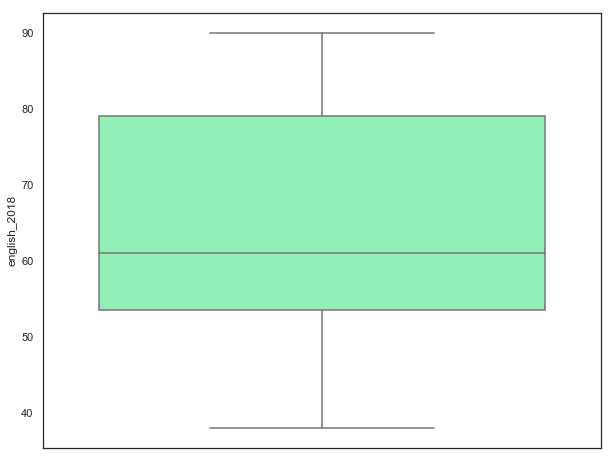

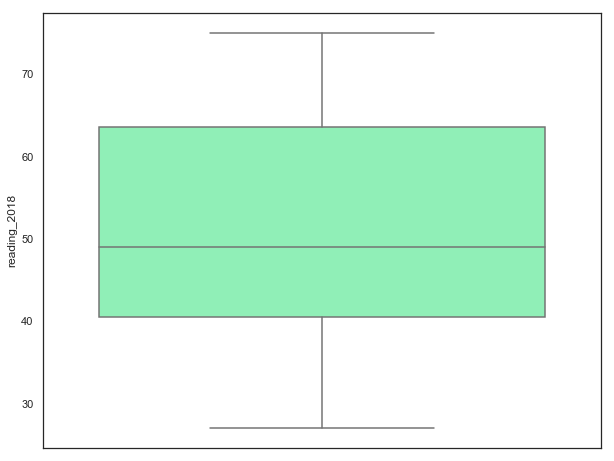

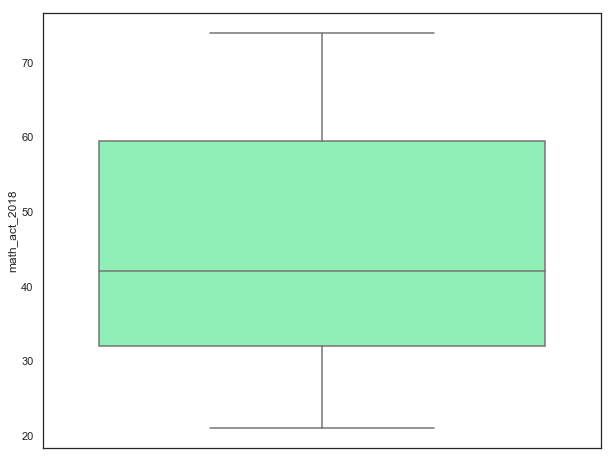

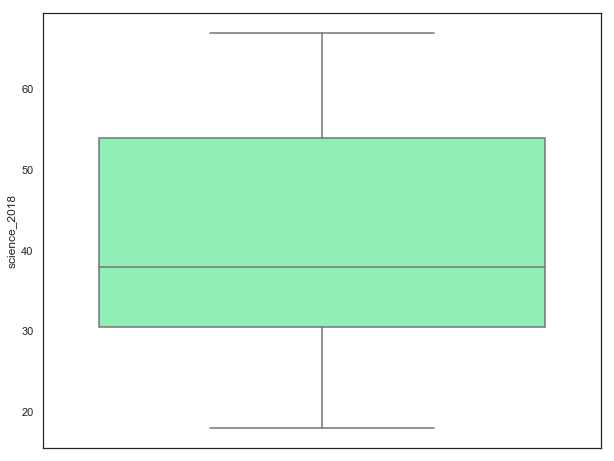

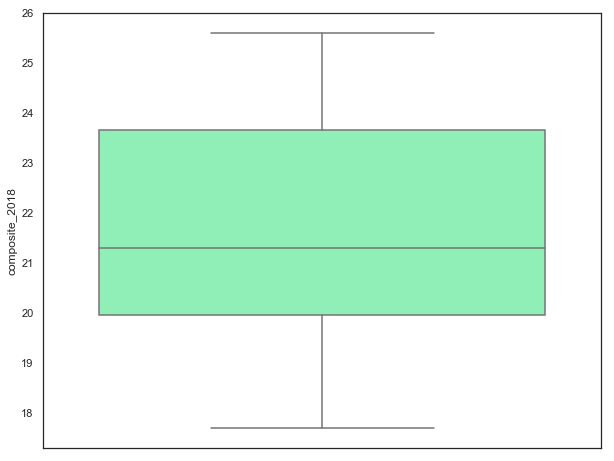

In [60]:
fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='math_act_2017')
#sns.boxplot(y='math_act_2017', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='reading_2017')
#sns.boxplot(y='reading_2017', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='science_2017')
#sns.boxplot(y='science_2017', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='composite_2017')
#sns.boxplot(y='composite_2017', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='ebrw_2018')
#sns.boxplot(y='ebrw_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='math_sat_2018')
#sns.boxplot(y='math_sat_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='total_2018')
#sns.boxplot(y='total_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='english_2018')
#sns.boxplot(y='english_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='reading_2018')
#sns.boxplot(y='reading_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='math_act_2018')
#sns.boxplot(x='math_act_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='science_2018')
#sns.boxplot(x='science_2018', data=final)

fig, ax= plt.subplots(figsize=(10,8))
sns.boxplot(data=final, palette='rainbow', orient='v', ax=ax,x='composite_2018')
#sns.boxplot(y='composite_2018', data=final)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

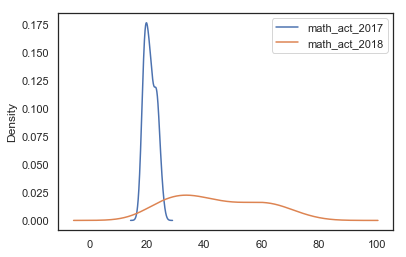

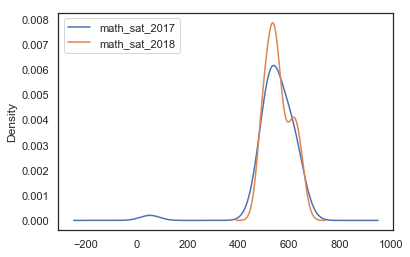

In [61]:
mathdf = final[['math_act_2017','math_act_2018']]
#mathdf
mathdf.plot.kde()

mathdf = final[['math_sat_2017','math_sat_2018']]
#mathdf
mathdf.plot.kde()

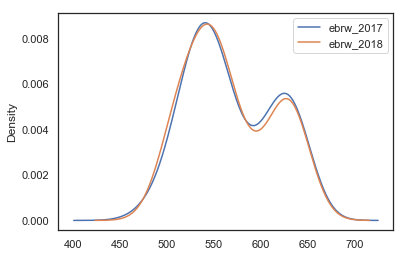

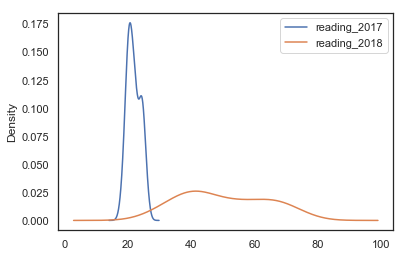

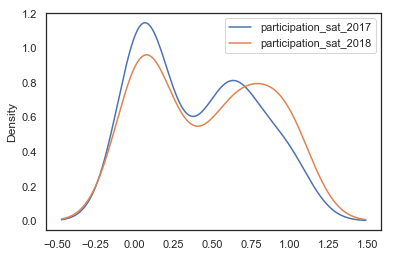

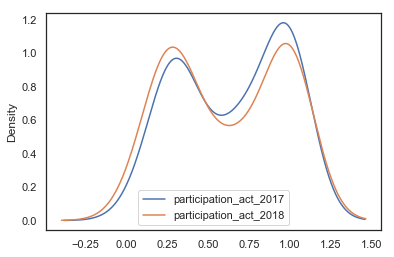

In [62]:
readingdf = final[['ebrw_2017','ebrw_2018']]
#readingdf
readingdf.plot.kde()

readingdf = final[['reading_2017','reading_2018']]
#readingdf
readingdf.plot.kde()

ratingdf = final[['participation_sat_2017','participation_sat_2018']]
#ratingdf
ratingdf.plot.kde()

ratingdf = final[['participation_act_2017','participation_act_2018']]
#ratingdf
ratingdf.plot.kde()

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: SAT --> EBRW,Maths and Participation is having normal distribution for 2017 and 2018. ACT --> Math and Reading do not seems to have normal distribution for both 2017 and 2018, whilst Participation rates for 2017 and 2018 is normally distributed 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:No, it does not makes sense to infer from the SAT and ACT partipation rates in 2017 as the distribution appears to be skewed in the centre, and sampling close to the mean may not yield consistent results

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: The maths scores for Math ACT does not have normal distribution across the population. Comparing the will yield std deviation which is less than acceptable to industry practices.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [63]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Text(0, 0.5, 'Participation Rates')

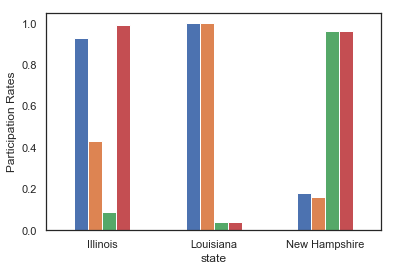

In [64]:
testdf = final[['state','participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']]
testdf = testdf[testdf.state.isin(['Illinois','Louisiana','New Hampshire'])]
testdf = testdf.set_index('state')

axes = testdf.plot.bar(rot=0,legend=False);
axes.set_ylabel("Participation Rates")

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [65]:
final[final['state'] =='North Dakota']

,state,participation_sat_2017,ebrw_2017,math_sat_2017,total_2017,participation_act_2017,english_2017,math_act_2017,reading_2017,science_2017,...,participation_sat_2018,ebrw_2018,math_sat_2018,total_2018,participation_act_2018,english_2018,reading_2018,math_act_2018,science_2018,composite_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,...,0.02,640,643,1283,0.98,57,43,39,34,20.3


North Dakota is consistently showing lowest SAT participation rate for 2017 and 2018. If we have additional data such as availability of number SAT eligible colleges might be a key concern which the college board should consider. It is particularly raise concern because the participation rate for ACT is on minimum concern.